In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from glob import glob

# momemta_out = '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights1.csv'
momemta_weight_paths = glob('/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_*.csv')
ground_truth_paths = glob('/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_*.npy')
observations_local = '/scratch/madminer_data/data/miner_lhe_data_shuffled.h5'
observations = h5py.File(observations_local, mode='r')
print observations['benchmarks']['values'][:]
print observations['benchmarks']['values'][:].shape

[[-5.        ]
 [-4.7349485 ]
 [-4.469897  ]
 [-4.2048455 ]
 [-3.939794  ]
 [-3.6747425 ]
 [-3.409691  ]
 [-3.1446395 ]
 [-2.879588  ]
 [-2.6145365 ]
 [-2.349485  ]
 [-2.0844335 ]
 [-1.819382  ]
 [-1.5543305 ]
 [-1.289279  ]
 [-1.0242275 ]
 [-0.759176  ]
 [-0.4941245 ]
 [-0.229073  ]
 [ 0.0359785 ]
 [ 0.30103   ]
 [ 0.        ]
 [-2.39794001]]
(23, 1)


In [2]:
# human readable sorting:
# https://stackoverflow.com/questions/2669059/how-to-sort-alpha-numeric-set-in-python
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [3]:
print sorted(momemta_weight_paths)
print sorted_nicely(momemta_weight_paths)
# momemta_results = np.genfromtxt(momemta_out, delimiter=",", autostrip=True)

ratio_list = []
widths = []
for momemta_weight_path in sorted_nicely(momemta_weight_paths):
    # get ratios for all events for a specific theta0/theta1
    momemta_results = np.genfromtxt(momemta_weight_path, delimiter=",", autostrip=True)
    theta0 = momemta_results[0]
    event_ratios = momemta_results[1:]
#     np.vstack((ratios, event_ratios))
    widths.append(theta0)
    ratio_list.append(event_ratios)
    
ratios = np.array(ratio_list).T
widths = np.array(widths)

['/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_0.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_10.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_12.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_14.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_16.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_18.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_2.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_20.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_4.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_6.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_8.csv']
['/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_0.csv', '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights_2.csv', '/home/zbhatti/co

In [4]:
print widths
print ratios

[1.00000e-05 3.38925e-05 1.14870e-04 3.89322e-04 1.31951e-03 4.47214e-03
 1.51572e-02 5.13714e-02 1.74110e-01 5.90102e-01 2.00000e+00]
[[1.73615e+00 1.12498e+08 6.38033e+00 ... 2.95774e+00 1.09285e+00
  2.58847e-01]
 [4.51589e+05 4.82145e+01 1.96055e+00 ... 1.51143e+00 1.81516e+00
  5.23052e-01]
 [3.99334e+03 8.77643e+07 8.33493e+00 ... 3.42823e+00 1.04840e+00
  7.92073e-01]
 ...
 [7.27042e+06 8.40050e+00 5.56715e+00 ... 8.22471e+00 1.01882e+00
  3.41827e-01]
 [1.31503e+00 1.37945e+00 1.19417e+00 ... 3.77226e+00 1.87693e+00
  6.16153e-01]
 [4.20710e+05 2.08839e+04 4.13008e+07 ... 3.15991e+01 2.14208e+00
  2.73322e-01]]


In [5]:
print ratios.shape
print widths.shape

(200, 11)
(11,)


In [6]:
# copied from debugging_llr.ipynb
theta0_cross_sections =  [2.61619795e+01, 1.55512765e+01, 9.58008506e+00, 6.04835670e+00,
 3.81019319e+00, 2.31626888e+00, 1.32175315e+00, 6.95138311e-01,
 3.36863812e-01, 1.56658100e-01, 7.40323636e-02, 3.63797596e-02,
 1.84847024e-02, 9.59716209e-03, 5.04793137e-03, 2.67726599e-03,
 1.42750882e-03, 7.62102832e-04, 4.04687115e-04, 2.11762178e-04,
 1.07273984e-04,]

sampled_cross_sections = theta0_cross_sections[::2]
ref_cross_section = 0.00023154
print(sampled_cross_sections, ref_cross_section)

([26.1619795, 9.58008506, 3.81019319, 1.32175315, 0.336863812, 0.0740323636, 0.0184847024, 0.00504793137, 0.00142750882, 0.000404687115, 0.000107273984], 0.00023154)


In [7]:
average_ratios = np.mean(ratios, axis=0)
average_ratios

array([2.01844500e+08, 4.82792172e+07, 9.02398571e+06, 1.25420598e+06,
       1.17974877e+05, 1.07070349e+04, 1.03738005e+03, 1.02073828e+02,
       1.02065435e+01, 1.85859905e+00, 5.43456160e-01])

In [8]:
widths

array([1.00000e-05, 3.38925e-05, 1.14870e-04, 3.89322e-04, 1.31951e-03,
       4.47214e-03, 1.51572e-02, 5.13714e-02, 1.74110e-01, 5.90102e-01,
       2.00000e+00])

In [9]:
# reversed_sampled_cross_sections = [c for c in reversed(sampled_cross_sections)]
normalized_ratios = ratios[:, None]/sampled_cross_sections * ref_cross_section
normalized_average_ratios = average_ratios/sampled_cross_sections * ref_cross_section
estimated_log_likelihood_average_ratios = -2*np.log(normalized_average_ratios)
estimated_log_likelihood_ratios = 2*np.log(normalized_ratios)
print estimated_log_likelihood_average_ratios.shape, estimated_log_likelihood_ratios.shape

(11,) (200, 1, 11)


Text(0.5,0,'Higgs Width (GeV)')

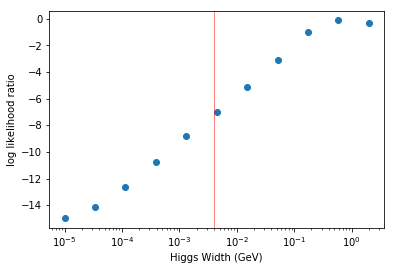

In [10]:
plt.plot(widths, estimated_log_likelihood_average_ratios, 'o')
plt.axvline(x=4E-3, color='red', linewidth=0.5) # expected global minimum
plt.xscale('log')
plt.ylabel('log likelihood ratio')
plt.xlabel('Higgs Width (GeV)')

In [11]:
theta0_indices = [] 
ground_truth_ratios_list = []
for ground_truth_path in sorted_nicely(ground_truth_paths):
    ratios = np.load(ground_truth_path)[:].flatten()
    print ground_truth_path, ratios.shape
    ground_truth_ratios_list.append(ratios)
    theta0_idx = int(ground_truth_path.split('_')[-1].split('.')[0])
    theta0_indices.append(theta0_idx)
log_likelihood_ground_truth_ratios = np.log(np.array(ground_truth_ratios_list).T)
print log_likelihood_ground_truth_ratios.shape

/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_0.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_2.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_4.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_6.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_8.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_10.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_12.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_14.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_16.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_18.npy (200,)
/scratch/madminer_data_higgs4l/data/samples/r_xz_test_truth_20.npy (200,)
(200, 11)


(200, 11) (200, 1, 11)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)
(200,) (200,)


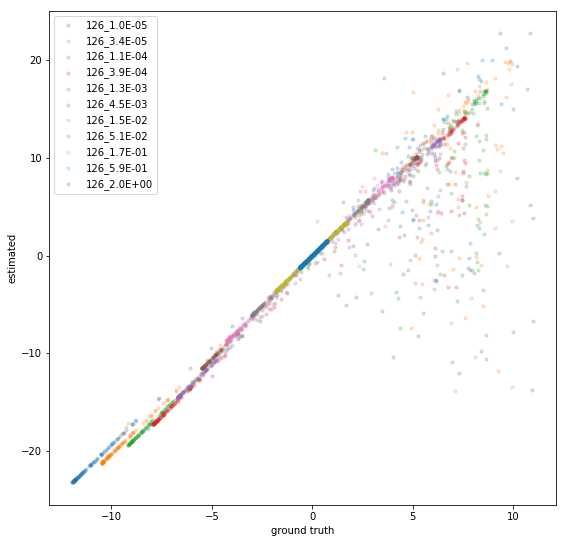

In [12]:
fig1 = plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(221)
print log_likelihood_ground_truth_ratios.shape, estimated_log_likelihood_ratios.shape
sampled_theta0_indices = range(estimated_log_likelihood_ratios.shape[2])
# for idx, estimated_llr in enumerate(estimated_log_likelihood_ratios):
for idx in sampled_theta0_indices:
    theta0_idx = theta0_indices[idx]
    theta0_benchmark_name = observations['benchmarks']['names'][theta0_idx]
    ground_truth_events = log_likelihood_ground_truth_ratios.T[idx][:]
    estimated_events = estimated_log_likelihood_ratios.T[idx].flatten()
    print ground_truth_events.shape, estimated_events.shape
    ax1.scatter(ground_truth_events, estimated_events, s=10, alpha=0.2, label=theta0_benchmark_name)
ax1.set_xlabel('ground truth')
ax1.set_ylabel('estimated')
ax1.legend()